**MULTILANGUAGE SPAM DETECTION**

In [ ]:
# Install libraries
# ! pip install pandas
# ! pip install nltk
# ! pip install scikit-learn

# Import libraries
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

**Data set loading**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv',encoding='latin-1')
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# drop unnecessary columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
#Check null values
df.isnull().sum()

class      0
message    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

class
ham     4516
spam     653
Name: count, dtype: int64


<Axes: xlabel='class'>

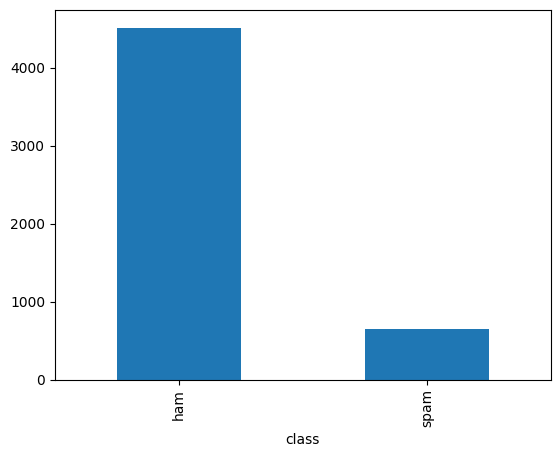

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

**PREPROCESSING**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()

In [ ]:
def text_preprocess(message):
    # Remove punctuations
    nopunc = [char for char in message if char not in string.punctuation]

    # Join the characters again
    nopunc = "".join(nopunc)
    nopunc = nopunc.lower()

    # Remove any stopwords and non-alphabetic characters
    nostop = [
        word
        for word in nopunc.split()
        if word.lower() not in stopwords.words("english") and word.isalpha()
    ]

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in nostop]

    # Stem each word
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in lemmatized_words]

    return stemmed_words

In [ ]:
spam_messages = df[df["class"] == "spam"]["message"]
ham_messages = df[df["class"] == "ham"]["message"]
print(f"Number of spam messages: {len(spam_messages)}")
print(f"Number of ham messages: {len(ham_messages)}")

Number of spam messages: 653
Number of ham messages: 4516


In [ ]:
!python -m nltk.downloader stopwords


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Words in spam messages
spam_words = []
for each_message in spam_messages:
    spam_words += text_preprocess(each_message)

print(f"Top 10 spam words are:\n {pd.Series(spam_words).value_counts().head(10)}")

Top 10 spam words are:
 call     321
free     188
txt      137
u        130
text     121
ur       119
mobil    114
stop     103
repli    100
claim     98
Name: count, dtype: int64


In [ ]:
# Words in ham messages
ham_words = []
for each_message in ham_messages:
    ham_words += text_preprocess(each_message)

print(f"Top 10 ham words are:\n {pd.Series(ham_words).value_counts().head(10)}")

Top 10 ham words are:
 u       929
im      435
go      427
get     352
come    272
ltgt    254
ok      246
dont    242
like    232
call    232
Name: count, dtype: int64


In [ ]:
# Remove punctuations/stopwords from all messages
df["message"] = df["message"].apply(text_preprocess)
df.head()

,class,message
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, dont, think, go, usf, life, around, though]"


In [ ]:
# Convert messages (as lists of string tokens) to strings
df["message"] = df["message"].agg(lambda x: " ".join(map(str, x)))
df.head()

,class,message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think go usf life around though


In [ ]:
x=df['message'].values
y=df['class'].values

In [ ]:
df['class'].value_counts()

class
ham     4516
spam     653
Name: count, dtype: int64

**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
x_train.shape

(3876,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
x_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**LINEAR SVC**

In [ ]:
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC
model1 = LinearSVC(class_weight = 'balanced')
model1.fit(x_train_vect,y_train)


LinearSVC(class_weight='balanced')

In [ ]:
y_pred1=model1.predict(x_test_vect)
# ypred1=model1.predict(x_train_vect)
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred1)
# accuracy_train = accuracy_score(y_train, ypred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
con_svc = confusion_matrix(y_test, y_pred1)

print("Accuracy:", accuracy)
# print("Accuracy of training data:", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", con_svc)

Accuracy: 0.9783449342614076
Precision: 0.978045195182566
Recall: 0.9783449342614076
F1-score: 0.9780688362614488
Confusion Matrix:
 [[1112    9]
 [  19  153]]


In [ ]:
from sklearn.pipeline import make_pipeline
model2= make_pipeline(CountVectorizer(),LinearSVC())
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9775715390564579
Precision: 0.9772518582292549
Recall: 0.9775715390564579
F1-score: 0.9771957506673663
Confusion Matrix:
 [[1113    8]
 [  21  151]]


**MULTINOMIAL NAIVEBAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(x_train_vect,y_train)


MultinomialNB()

In [ ]:
y_pred3=model3.predict(x_test_vect)
# ypred3 = model3.predict(x_train_vect)
y_pred3

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred3)
# accuracy_train = accuracy_score(y_train,ypred3)
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')
con_nb = confusion_matrix(y_test, y_pred3)

print("Accuracy:", accuracy)
# print("Accuracy of training data:", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", con_nb)

Accuracy: 0.979891724671307
Precision: 0.9796780635078994
Recall: 0.979891724671307
F1-score: 0.9797400837417847
Confusion Matrix:
 [[1111   10]
 [  16  156]]


In [ ]:
from sklearn.pipeline import make_pipeline
model4= make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4, average='weighted')
recall = recall_score(y_test, y_pred4, average='weighted')
f1 = f1_score(y_test, y_pred4, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.979891724671307
Precision: 0.9796780635078994
Recall: 0.979891724671307
F1-score: 0.9797400837417847
Confusion Matrix:
 [[1111   10]
 [  16  156]]


**DECISION TREE**

In [ ]:
from sklearn import tree

In [ ]:
model5= tree.DecisionTreeClassifier()
model5.fit(x_train_vect,y_train)
y_pred5=model5.predict(x_test_vect)
# ypred5 = model5.predict(x_train_vect)
y_pred5

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred5)
# accuracy_train = accuracy_score(y_train , ypred5)
precision = precision_score(y_test, y_pred5, average='weighted')
recall = recall_score(y_test, y_pred5, average='weighted')
f1 = f1_score(y_test, y_pred5, average='weighted')
con_dt = confusion_matrix(y_test, y_pred5)

print("Accuracy:", accuracy)
# print("Accuracy of training data:", accuracy_train)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", con_dt)

Accuracy: 0.9605568445475638
Precision: 0.9604616968871744
Recall: 0.9605568445475638
F1-score: 0.9605081397365096
Confusion Matrix:
 [[1096   25]
 [  26  146]]


**predicting new text (MULTILANGUAGE)**

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=fbca862d34b3f2956d9e9886c67b8d96058454a43946467ed8f6b2df601bec71
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from googletrans import Translator
translator = Translator(service_urls=['translate.googleapis.com'])
translate_text=translator.translate("07732584351 - రోడ్జర్ బర్న్స్ - MSG = మేము ఉచిత నోకియా మొబైల్ + ఉచిత క్యామ్‌కార్డర్ కోసం మా smsకి మీ ప్రత్యుత్తరానికి కాల్ చేయడానికి ప్రయత్నించాము. రేపు డెలివరీ కోసం దయచేసి ఇప్పుడే 08000930705కు కాల్ చేయండి", dest='en')
trans=translate_text.text

In [ ]:
translator = Translator(service_urls=['translate.googleapis.com'])
translate_text=translator.translate("మీరు ఇప్పుడే చేసిన ఇంటి పనులతో మూర్ఛపోతారేమో అనే భయంతో? త్వరగా ఒక కప్పు తీసుకోండి", dest='en')
trans=translate_text.text

In [ ]:
model4.predict([trans])

array(['ham'], dtype='<U4')

In [ ]:
translator = Translator(service_urls=['translate.googleapis.com'])
translate_text=translator.translate("You are a winner U have been specially selected 2 receive �1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910", dest='en')
trans=translate_text.text

In [ ]:
model4.predict([trans])

array(['spam'], dtype='<U4')

In [ ]:
# You are a winner U have been specially selected 2 receive �1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910

translator = Translator(service_urls=['translate.googleapis.com'])
translate_text=translator.translate("आप एक विजेता हैं यू को विशेष रूप से चुना गया है 2  1000 प्राप्त करें या 4* छुट्टियाँ (उड़ान सहित) लाइव ऑपरेटर से बात करें 2 दावा 0871277810910", dest='en')
trans=translate_text.text

In [ ]:
model4.predict([trans])

array(['spam'], dtype='<U4')

<BarContainer object of 3 artists>

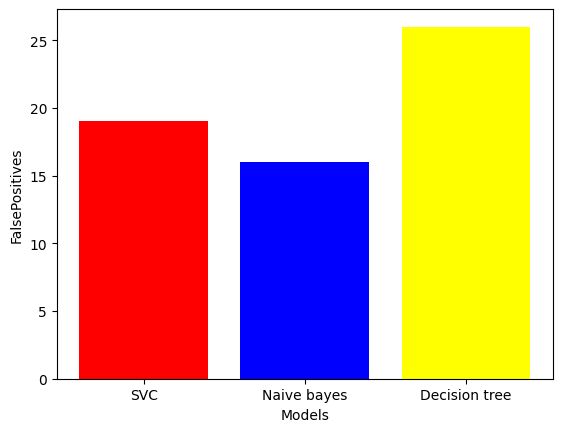

In [ ]:
import matplotlib.pyplot as plt

models = ["SVC" , "Naive bayes" , "Decision tree"]
falseneg = [con_svc[1][0] , con_nb[1][0] , con_dt[1][0]]
plt.xlabel("Models")
plt.ylabel("FalsePositives")
plt.bar(models,falseneg,color=['red','blue','yellow'])